In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/data/cphillips/miniconda3/envs/dev/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [7]:
%load_ext autoreload
%autoreload 1

In [8]:
%aimport make_index

In [9]:
import satpy

In [10]:
import pyresample

In [11]:
import pandas as pd

In [12]:
import cartopy.crs as ccrs

In [13]:
from satpy.readers.utils import bbox, get_geostationary_angle_extent

In [14]:
f = 'l1b/g16/20200925T1800/01/OR_ABI-L1b-RadF-M6C01_G16_s20202691800201_e20202691809509_c20202691809570.nc'

In [15]:
area = make_index.get_area(f)

/data/cphillips/miniconda3/envs/dev/lib/python3.8/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()


In [16]:
scene = satpy.Scene([f],reader='abi_l1b')

In [17]:
scene.load(['C01'])

/data/cphillips/miniconda3/envs/dev/lib/python3.8/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()


In [18]:
c01 = scene['C01']

# Just illustrate the idea

In [14]:
# 10 degree grid
grid = make_index.get_grid(10)

In [16]:
%%time
grid_idx, sat_idx = make_index.get_index(area, grid, radius=150e3)

CPU times: user 23.7 s, sys: 39.6 s, total: 1min 3s
Wall time: 1min 5s


In [17]:
d = np.zeros(area.shape, dtype=np.uint32)
d.ravel()[sat_idx] = 1

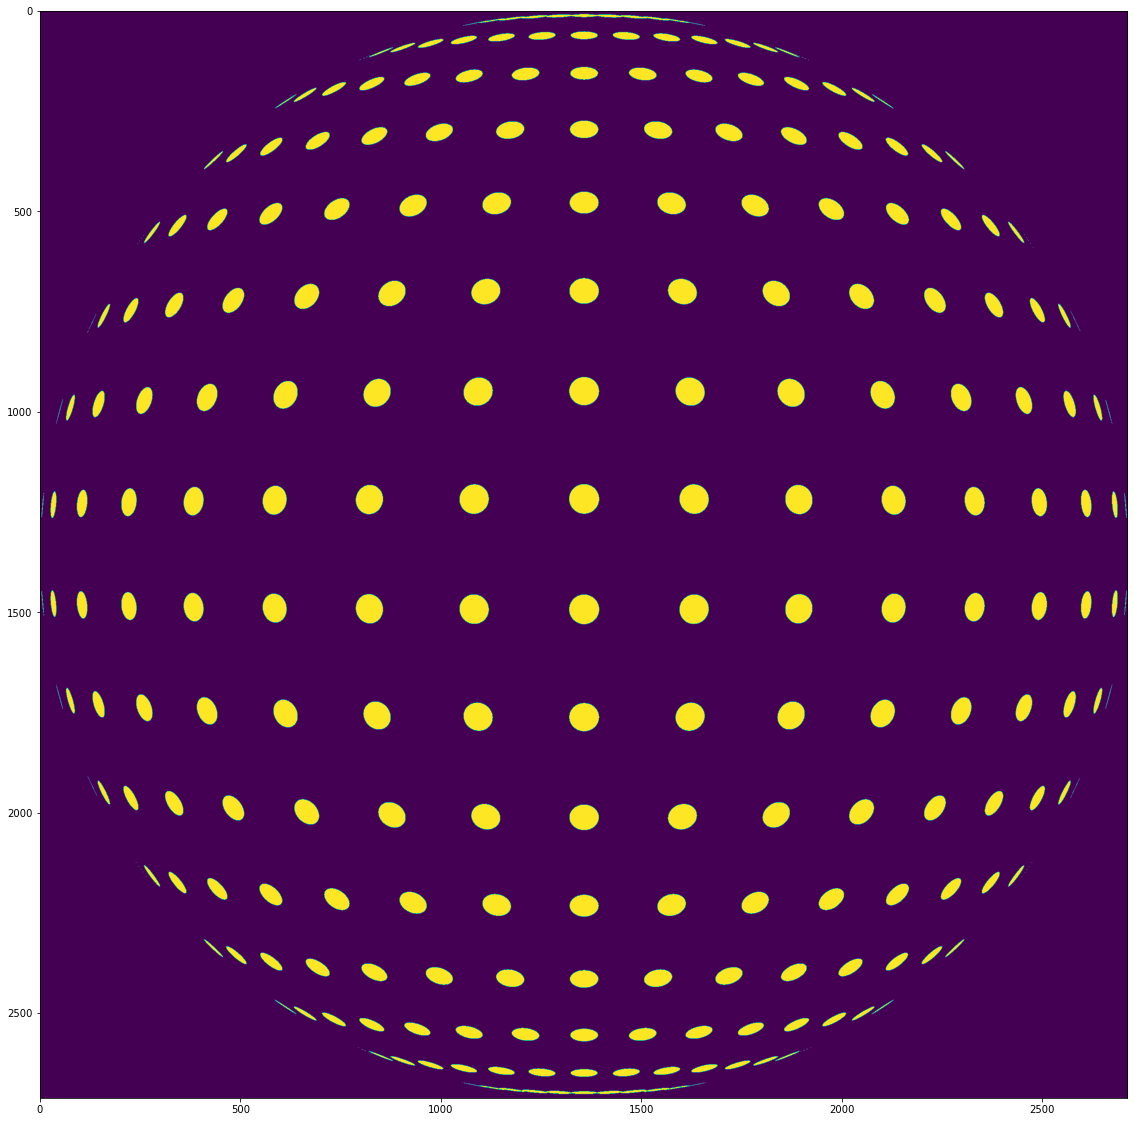

In [18]:
figure(figsize=(20,20))
imshow(d[::4,::4])

# Ok, run `make_index.py` elsewhere to make some indices

# Test

In [19]:
import numpy as np
import pandas as pd

In [20]:
f = 'l1b/g16/20200925T1800/01/OR_ABI-L1b-RadF-M6C01_G16_s20202691800201_e20202691809509_c20202691809570.nc'

In [21]:
dst = np.memmap('./index/g16/01/dst_index.dat', mode='r', dtype=np.uint64)
src = np.memmap('./index/g16/01/src_index.dat', mode='r', dtype=np.uint64)

In [22]:
%%time
a = pd.Series(c01.values.ravel()[src].astype(np.float32), index=dst)

CPU times: user 2.91 s, sys: 3.94 s, total: 6.86 s
Wall time: 4.38 s


In [23]:
%%time
a_mean = a.groupby(a.index).mean().dropna()

CPU times: user 8.25 s, sys: 5.44 s, total: 13.7 s
Wall time: 13.7 s


In [24]:
%%time
out = np.full((180*20,360*20), np.nan, dtype=np.float32)
out.ravel()[a_mean.index] = a_mean

CPU times: user 46.9 ms, sys: 48.1 ms, total: 95.1 ms
Wall time: 94.1 ms


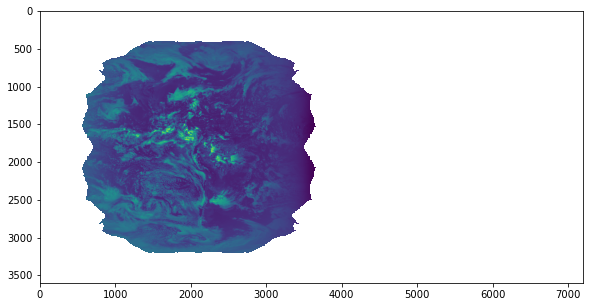

In [25]:
figure(figsize=(10,5))
imshow(out)